In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read data
test =  data.DataReader(["TSLA","FB"],"yahoo", start = "2018/01/01",end ="2019/12/31")
test.head()

Attributes  Adj Close                  Close                   High  \
Symbols          TSLA          FB       TSLA          FB       TSLA   
Date                                                                  
2018-01-02  64.106003  181.419998  64.106003  181.419998  64.421997   
2018-01-03  63.450001  184.669998  63.450001  184.669998  65.050003   
2018-01-04  62.924000  184.330002  62.924000  184.330002  63.709999   
2018-01-05  63.316002  186.850006  63.316002  186.850006  63.448002   
2018-01-08  67.281998  188.279999  67.281998  188.279999  67.403999   

Attributes                    Low                   Open              \
Symbols             FB       TSLA          FB       TSLA          FB   
Date                                                                   
2018-01-02  181.580002  62.200001  177.550003  62.400002  177.679993   
2018-01-03  184.779999  63.110001  181.330002  64.199997  181.880005   
2018-01-04  186.210007  61.136002  184.100006  62.574001  184.899994   
2018-01-05  186.899994  62.400002  184.929993  63.324001  185.589996   
2018-01-08  188.899994  63.099998  186.330002  63.200001  187.199997   

Attributes    Volume            
Symbols         TSLA        FB  
Date                            
2018-01-02  21761000  18151900  
2018-01-03  22607500  16886600  
2018-01-04  49731500  13880900  
2018-01-05  22956000  13574500  
2018-01-08  49297000  17994700

# Building an optimal risky portfolio

In [4]:
#Let’s get started by pulling the required asset data from Yahoo
# Import data
data1 = data.DataReader(["GOOGL","AAPL", "AMZN","NKE"],"yahoo", start = "2018/01/01",end ="2019/12/31")
data1.head()

Attributes    Adj Close                                           Close  \
Symbols           GOOGL       AAPL         AMZN        NKE        GOOGL   
Date                                                                      
2018-01-02  1073.209961  41.380238  1189.010010  61.411564  1073.209961   
2018-01-03  1091.520020  41.373032  1204.199951  61.401890  1091.520020   
2018-01-04  1095.760010  41.565216  1209.589966  61.363197  1095.760010   
2018-01-05  1110.290039  42.038452  1229.140015  61.885525  1110.290039   
2018-01-08  1114.209961  41.882305  1246.869995  62.436867  1114.209961   

Attributes                                            High             ...  \
Symbols          AAPL         AMZN        NKE        GOOGL       AAPL  ...   
Date                                                                   ...   
2018-01-02  43.064999  1189.010010  63.490002  1075.979980  43.075001  ...   
2018-01-03  43.057499  1204.199951  63.480000  1096.099976  43.637501  ...   
2018-01-04  43.257500  1209.589966  63.439999  1104.079956  43.367500  ...   
2018-01-05  43.750000  1229.140015  63.980000  1113.579956  43.842499  ...   
2018-01-08  43.587502  1246.869995  64.550003  1119.160034  43.902500  ...   

Attributes          Low                    Open                          \
Symbols            AMZN        NKE        GOOGL       AAPL         AMZN   
Date                                                                      
2018-01-02  1170.510010  62.849998  1053.020020  42.540001  1172.000000   
2018-01-03  1188.300049  62.759998  1073.930054  43.132500  1188.300049   
2018-01-04  1204.660034  62.549999  1097.089966  43.134998  1205.000000   
2018-01-05  1210.000000  63.470001  1103.449951  43.360001  1217.510010   
2018-01-08  1232.030029  63.980000  1111.000000  43.587502  1236.000000   

Attributes                Volume                                      
Symbols           NKE      GOOGL         AAPL       AMZN         NKE  
Date                                                                  
2018-01-02  62.849998  1588300.0  102223600.0  2694500.0   6511000.0  
2018-01-03  63.480000  1565900.0  118071600.0  3108800.0   6091100.0  
2018-01-04  63.400002  1302600.0   89738400.0  3022100.0   5780500.0  
2018-01-05  63.700001  1512500.0   94640000.0  3544700.0  11632300.0  
2018-01-08  64.150002  1232200.0   82271200.0  4279500.0  11905700.0  

[5 rows x 24 columns]

In [5]:
#there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘Adj Close’ column. This colum gives us the closing price of company’s stock on the given day.
# Closing price
data1 = data1['Adj Close']
data1.head()
    

Symbols,GOOGL,AAPL,AMZN,NKE
Date,,,,
2018-01-02,1073.209961,41.380238,1189.010010,61.411564
2018-01-03,1091.520020,41.373032,1204.199951,61.401890
2018-01-04,1095.760010,41.565216,1209.589966,61.363197
2018-01-05,1110.290039,42.038452,1229.140015,61.885525
2018-01-08,1114.209961,41.882305,1246.869995,62.436867


# we perform necessary operations to display log change in prices of stocks each day.

In [6]:
# Log of percentage change
cov_matrix = data1.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,GOOGL,AAPL,AMZN,NKE
Symbols,,,,
GOOGL,0.000269,0.000178,0.000216,0.000119
AAPL,0.000178,0.000303,0.000206,0.000122
AMZN,0.000216,0.000206,0.000363,0.000139
NKE,0.000119,0.000122,0.000139,0.000253


# The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

In [9]:
corr_matrix = data1.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,GOOGL,AAPL,AMZN,NKE
Symbols,,,,
GOOGL,1.000000,0.621640,0.692366,0.453669
AAPL,0.621640,1.000000,0.620295,0.439667
AMZN,0.692366,0.620295,1.000000,0.458710
NKE,0.453669,0.439667,0.458710,1.000000


#  Portfolio Variance
# The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:
# $$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

In [12]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00020399682630942026

# Portfolio expected returns

In [13]:
# Yearly returns for individual companies
R_bar = data1.resample('Y').last().pct_change().mean()
R_bar

Symbols
GOOGL    0.281762
AAPL     0.889578
AMZN     0.230278
NKE      0.380941
dtype: float64

In [14]:
#Portfolio returns
w = [0.1,0.2,0.5,0.2]
port_er = (w * R_bar).sum()
port_er

0.39741877487089966

# Plotting the efficient frontier

In [16]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data1.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
GOOGL    0.259518
AAPL     0.275126
AMZN     0.301127
NKE      0.251737
dtype: float64

In [18]:
assets = pd.concat([R_bar, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
GOOGL,0.281762,0.259518
AAPL,0.889578,0.275126
AMZN,0.230278,0.301127
NKE,0.380941,0.251737


In [20]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(data1.columns)
num_portfolios = 10000

In [21]:
#the covariance matrix 
data2 = data1.pct_change().apply(lambda x: np.log(1+x)) #log percentage of change
cov_matrix = data2.cov() # covariance 
cov_matrix

Symbols,GOOGL,AAPL,AMZN,NKE
Symbols,,,,
GOOGL,0.000269,0.000178,0.000216,0.000119
AAPL,0.000178,0.000303,0.000206,0.000122
AMZN,0.000216,0.000206,0.000363,0.000139
NKE,0.000119,0.000122,0.000139,0.000253


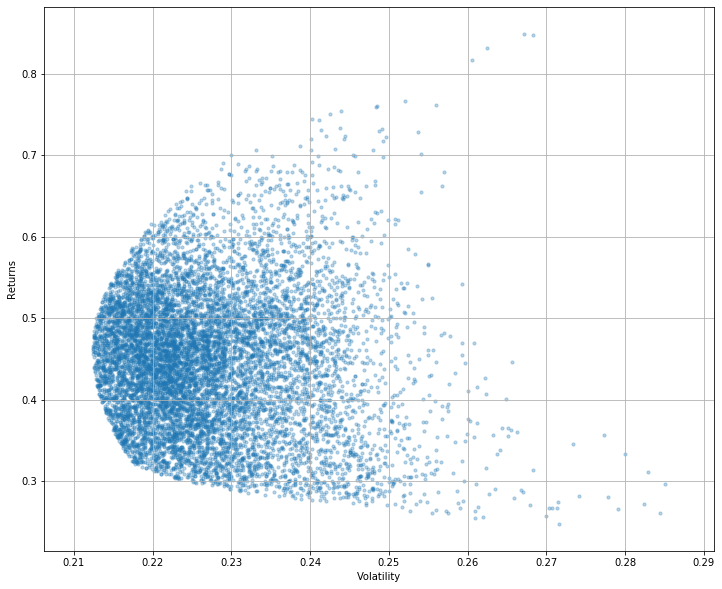

In [22]:
# calculate the returns and risk (Volatility)
for portfolio in range (num_portfolios):
    
    #a.get the random numbers for weights
    weights =np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    R_bar = data1.resample('Y').last().pct_change().mean()
    #R_bar
    returns = np.dot(weights,R_bar)
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis =0).mul(weights, axis=1).sum().sum() # portfolio variance
    sd = np.sqrt(var) # daily standard deviation
    ann_sd = sd*np.sqrt(250) #annual standard deviation = volatility
    p_vol.append(ann_sd)
    
    
data = {'Returns': p_ret,'Volatility':p_vol}

for counter, symbol in enumerate(data1.columns.tolist()):
    data[symbol+ 'weight'] = [w[counter] for w in p_weights]

    
portfolios = pd.DataFrame(data)
portfolios.head() 

# 4 plotting  the efficient frontier graph
portfolios.plot.scatter(x='Volatility',y ='Returns', marker ='o',s =10, alpha =0.3,grid = True, figsize=[12,10])
    

#  Minimum volatility 

In [24]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.462205
Volatility     0.212431
GOOGLweight    0.293289
AAPLweight     0.222201
AMZNweight     0.017707
NKEweight      0.466803
Name: 4782, dtype: float64

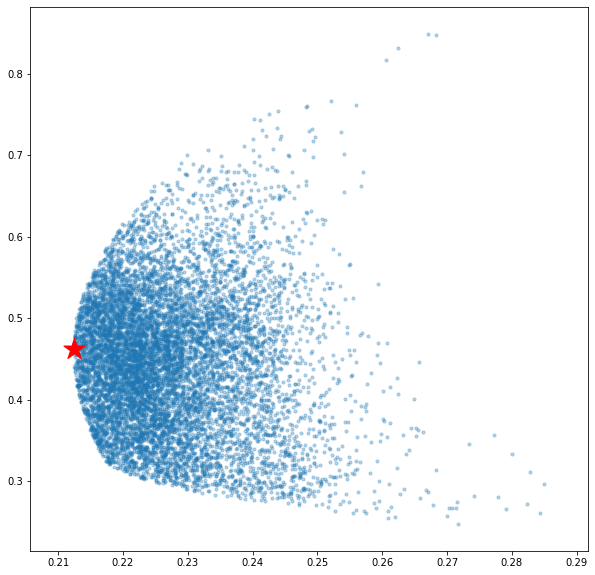

In [25]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

# The red star denotes the most efficient portfolio with minimum volatility

In [23]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
rf = 0.01 
# idxmin() gives us the minimum value in the column specified.
print(min_vol_port)

Returns        0.462205
Volatility     0.212431
GOOGLweight    0.293289
AAPLweight     0.222201
AMZNweight     0.017707
NKEweight      0.466803
Name: 4782, dtype: float64


# The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

# This is done by using a parameter called the Sharpe Ratio.

# Optimal Risky Portfolio 
# An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

In [26]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.848437
Volatility     0.267094
GOOGLweight    0.027488
AAPLweight     0.931001
AMZNweight     0.022034
NKEweight      0.019477
Name: 8010, dtype: float64

In [27]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
print(optimal_risky_port)

Returns        0.848437
Volatility     0.267094
GOOGLweight    0.027488
AAPLweight     0.931001
AMZNweight     0.022034
NKEweight      0.019477
Name: 8010, dtype: float64


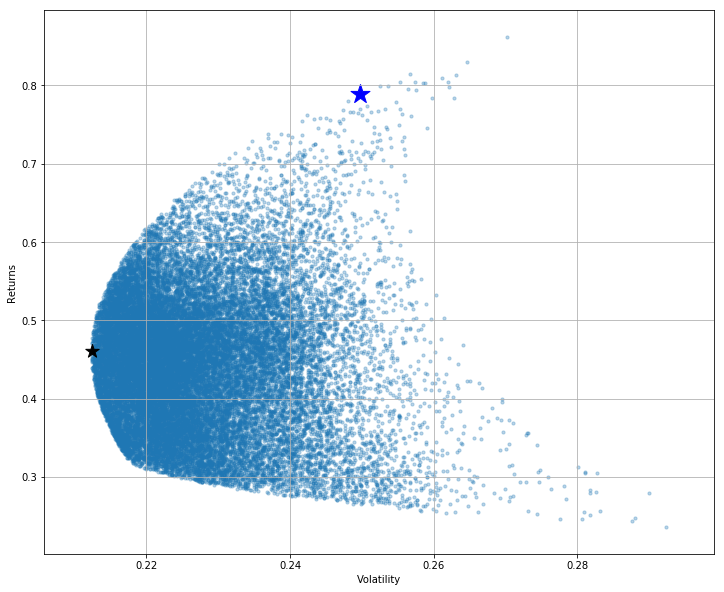

In [37]:
# optimal portfolio plot


fig,ax = plt.subplots(figsize=(12, 10))

ax.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
ax.scatter(min_vol_port[5], min_vol_port[4], color='black', marker='*', s=200)
ax.scatter(optimal_risky_port[5], optimal_risky_port[4], color='b', marker='*', s=400)
ax.set_xlabel("Volatility")
ax.set_ylabel("Returns")
ax.grid()
plt.show()

# The blue star represents the optimal risky portfolio